<a href="https://colab.research.google.com/github/CuadraAlconero/IDAL_IA3_CuadraAlconero/blob/main/computer_vision_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN

CNN o Convolutional Neural Networks son un tipo de red de neuronas que utiliza convoluciones para extraer características de una imagen o una señal (por ejemplo una serie temporal).

Tal y como hemos visto anteriormente la convolución tiene el potencial de extraer características de la entrada si se define correctamente el filtro de la convolución (en el caso de las imágenes) o una señal (en el caso de convoluciones 1d).

El uso de la convolución en este tipo de redes se ve sustentado por tres ideas principales:

- Las redes neuronales vanilla utilizan la multiplicación matricial para calcular interacciones entre cada peso en cada neurona con todas las entradas. Sin embargo una convolución es capaz de interactuar con decenas o cientos de píxeles a la vez mediante la ventana que deslizamos durante la convolución. Esto se traduce en que no es necesario almacenar un número tan elevado de parámetros ni ajustarlos lo que se traduce en un mejor rendimiento en cuanto a la memoria y al tiempo de computación.

- Los filtros calculados se deslizan a través de la imagen tratando de calcular la misma características en regiones diferentes de la misma. Si una característica útil se encuentra en un punto de la imagen, es posible que la misma característica puedad ser encontrada en otra región de la misma. Las redes convolucionales comparten parámetros de esta manera mientras que en una red vanilla cada peso interactúa de forma independiente con cada valor de la entrada una única vez.

- La propiedad descrita anteriormente (compartir parámetros) añade cierta tolerancia a la traslación de características dentro de una imagen.

Las redes convolucionales han demostrado un rendimiento muy alto en problemas de visión por computador siendo actualmente el estado del arte en este campo.

# Arquitectura tradicional de un modelo CNN

Generalmente cuando se diseñan arquitecturas con CNN se sigue el siguiente esquema:

- Bloque CNN+Pooling: En un primer instante se entrenan las capas convolucionales que suelen ir acompañadas de capas de pooling. Este primer bloque se centra en extraer características de la entrada.

- Flatten: Las salidas de la capa anterior son matrices de dos dimensiones. Debido a la arquitectura de estas redes (el final de la arquitectura suele ser una red neuronal tradicional), es necesario "aplanar" la información y convertirla en un vector de una única dimensión.

- Dense layers: Finalmente la arquitectura termina añadiendo una o más capas densas para procesar las características extraídas en el primer bloque.

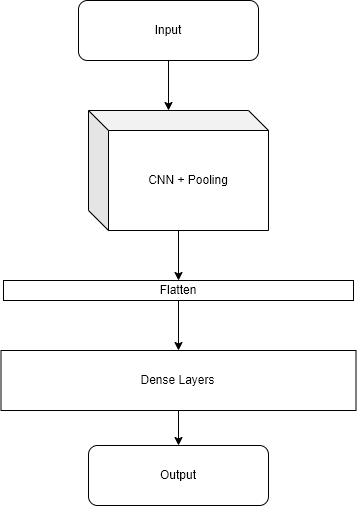

# El bloque convolucional

El bloque convolucional previamente descrito está formado por capas convolucionales y capas de pooling.

- Capa convolucional: Se entrena para extraer características de las entradas o las capas anteriores.

- Capa de pooling: Se utilizan para reducir la dimensionalidad mientras se mantiene la información de las activaciones más altas.

## La capa convolucional (1 Channel)

La capa convolucional está definida a través de filtros que realizarán convoluciones. Cada filtro hace de análogo con una neurona en una red neuronal vanilla y toman la forma de una matriz de pesos que se desliza sobre la entrada.
Para una matriz de dimensiones 3x3 la forma del filtro sería la siguiente:

\begin{matrix}
w_{11} & w_{12} & w_{13} \\
w_{21} & w_{22} & w_{23} \\
w_{31} & w_{32} & w_{33}
\end{matrix}

Cada filtro definido se organiza en la capa como si se tratara de un cubo y recibe la misma entrada. Al organizar los filtros de forma paralela y con pesos independientes se consigue que cada capa convolucional pueda entrenar filtros que se especialicen en extraer diferentes características. 

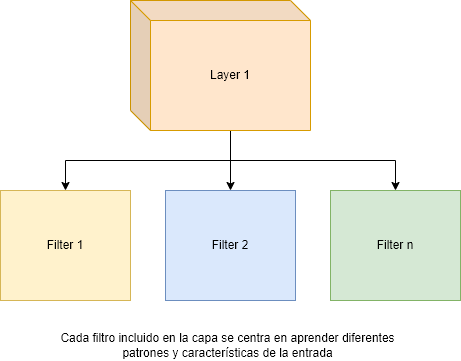

Es imposible que conocer que característica aprenderá cada filtro, sin embargo no es necesario, puesto que las características calculadas son fruto del entrenamiento con descenso por gradiente. Esto nos garantiza que las características extraídas de la imagen son las óptimas para nuestra tarea de aprendizaje.

Aunque no es posible conocer las características que se calcularán, sí que existe la intuición de que las características calculadas en las capas superiores de un modelo convolucional serán de carácter general (por ejemplo bordes y contornos) mientras que conforma se profundiza en las capas las características calculadas se centran en detalles particulares.



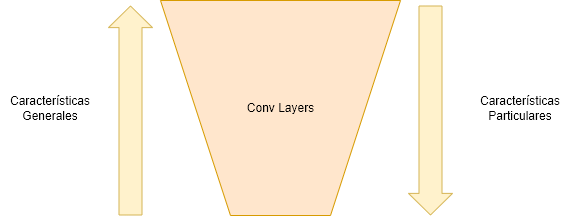

## Definir una capa convolucional en keras

Utilizando keras es posible definir una capa convolucional en un modelo. Para ello solo hay que seguir los siguientes pasos.

- Accedemos a la capa con keras.layers.Conv2D
- Definimos los siguientes parámetros
  - filters: Número de filtros que se van a incluir en esta capa
  - kernel_size: Tamaño del filtro. El tamaño del filtro definirá cuantos pesos se incluyen en cada filtro
  - strides: Velocidad de desplazamiento de la ventana
  - padding: Padding aplicado a la entrada
  - activation: Función de activación aplicada al filtro

In [1]:
import tensorflow.keras as keras

In [2]:
# Ejemplo
cnn_layer = keras.layers.Conv2D(10, (3,3), padding="same", strides=(2,1))

# Análisis dimensional de la convolución

Como hemos estudiado, una convolución altera necesariamente las dimensiones de la entrada tras la operación. Los parámetros que controlan las dimensiones de salida son:

K (Kernel Size) - Tamaño del filtro que se va a utilizar durante la convolución.
P (Padding) - Número de filas o columnas de padding que se van a añadir.
S (Stride) - Velocidad de desplazamiento horizontal o vertical del filtro durante la convolución.

Para una dimensión de entrada $I_x$ la dimensión de salida $O_x$ se calcularía:

$O_x = \frac{I_x-K+2P}{S_x}+1$

Y para la dimensión vertical:

$O_y = \frac{I_y-K+2P}{S_y}+1$

In [3]:
X, Y = keras.datasets.mnist.load_data(path="mnist.npz")

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
X[0][0].shape

(28, 28)

In [55]:
# Planteamos un modelo para analizar las salidas
# Dimension esperada (1, 26, 26, 1)
# Parámetros K = 3
input_layer = keras.layers.Input(shape=(28,28,1))
conv_layer = keras.layers.Conv2D(1, kernel_size=(3,3), 
                                 input_shape=(28,28,1),
                                 padding="valid",
                                 data_format="channels_last")(input_layer)
model = keras.Model(inputs=input_layer, outputs=conv_layer)
model.compile()

In [56]:
reshaped_sample = X[0][0].reshape(1,28,28,1)

In [57]:
prediction = model.predict(reshaped_sample)

In [58]:
prediction.shape

(1, 26, 26, 1)

In [59]:
# Planteamos un modelo para analizar las salidas
# Dimension esperada (1, 13, 26, 1)
# Parámetros K = 3, Sx = 2, Sy=1
input_layer = keras.layers.Input(shape=(28,28,1))
conv_layer = keras.layers.Conv2D(1, kernel_size=(3,3), 
                                 input_shape=(28,28,1),
                                 strides=(2,1),
                                 padding="valid",
                                 data_format="channels_last")(input_layer)
model = keras.Model(inputs=input_layer, outputs=conv_layer)
model.compile()

In [60]:
prediction = model.predict(reshaped_sample)
prediction.shape

(1, 13, 26, 1)

# Ejercicio

Plantead un modelo de Keras para obtener las siguientes dimensiones a la salida:

(1, 13, 13, 1)

(1, 24, 24, 1)

(1, 12, 24, 1)

(1, 28, 28, 1)

In [61]:
# Escribid vuestro código aquí

# Capa Flatten en Keras

Aunque conceptualmente la arquitectura previa parece bastante clara a nivel operacional es necesario definir las operaciones vectoriales que se van a realizar durante el entrenamiento del modelo. 

Mientras que las operaciones de convolución son realizadas sobre matrices en dos dimensiones con las siguientes dimensiones:

$(n_{batch}, x, y, n_{channels})$

Las redes neuronales tradicionales esperan las siguientes dimensiones:

$(n_{batch}, n_{features})$

Para permitir que la información que se extrae de las capas convolucionales pueda pasar a una red neuronal vanilla reorganizaremos la información con la siguiente operación:

$n_{features} = x*y*n_{channels}$

La capa flatten de keras se encarga de realizar esta operación por nosotros.

In [64]:
# Planteamos un modelo para analizar las salidas
# Dimensión esperada (1, 26, 26, 1)
# Parámetros K = 3
# Dimensión del flatten  (1, 676)
input_layer = keras.layers.Input(shape=(28,28,1))
conv_layer = keras.layers.Conv2D(1, kernel_size=(3,3), 
                                 input_shape=(28,28,1),
                                 padding="valid",
                                 data_format="channels_last")(input_layer)
flat = keras.layers.Flatten(data_format="channels_last")(conv_layer)
model = keras.Model(inputs=input_layer, outputs=flat)
model.compile()

In [65]:
prediction = model.predict(reshaped_sample)
prediction.shape

(1, 676)

# Ejercicio 

Añadid una capa flatten a los dos primeros modelos del ejercicio anterior y comprobad las dimensiones de salida

# La capa de pooling

La idea de las capas de pooling es reducir la dimensión de entrada de la capa mientras se mantiene la información relevante y se descarta la información que no sea útil para la tarea. 

Es importante mencionar que en una red de neuronas la información útil es representada por las activaciones altas, en base a esto se proponen dos técnicas de pooling que se explicarán a continuación:

- Average Pooling: En el average pooling una ventana se desliza sobre todos los valores de la entrada y calcula la media



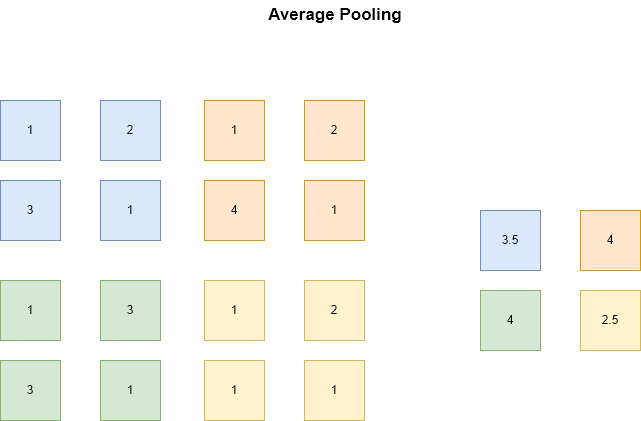

- Max Pooling: En el max pooling una ventana se desliza sobre todos los valores de la entrada y se queda únicamente con el valor máximo.

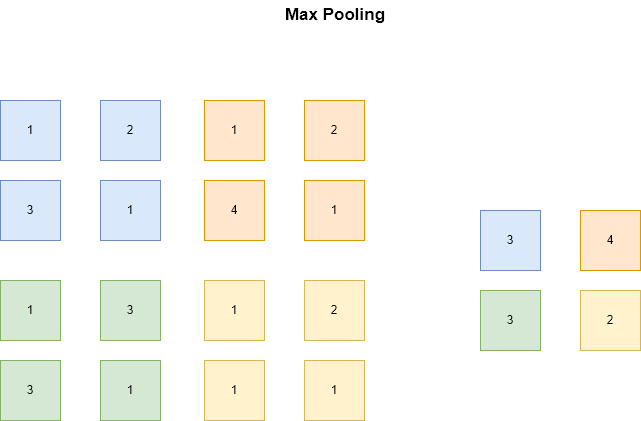

# Ejercicio

Construid la arquitectura previamente descrita (sin capas de Pooling) utilizando la api funcional de Keras. Entrenad un clasificador sobre el dataset de mnist numbers: https://keras.io/api/datasets/mnist/

In [ ]:
X, Y = keras.datasets.mnist.load_data(path="mnist.npz")